# "Data Science & Business Analytics Internship" - The Spark Foundation

Batch: November23

# Muhammad Moiz Uddin Farooqui

### Task 01: Predict the percentage of a student based on the number of study hours.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

### Loading Dataset

In [3]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
print("Data Imported Successfully")

Data Imported Successfully


### Understanding Data

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualizing Data

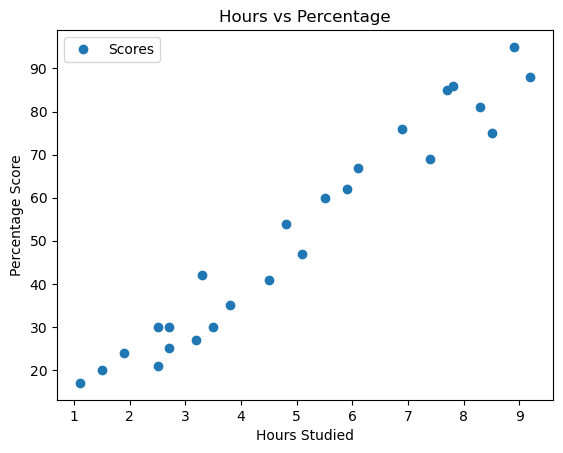

In [20]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Linear Regression Model - Data Fitting and Prediction

In [22]:
lm=LinearRegression()

In [31]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [65]:
X=df[['Hours']]
y=df['Scores']
lm.fit(X.values,y.values)
Y_predicted=lm.predict(X.values)

In [66]:
result = pd.DataFrame({'Actual': y, 'Predicted': Y_predicted})
result

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


In [67]:
lm.intercept_

2.48367340537321

In [68]:
lm.coef_

array([9.77580339])

### Visualization of Actual and Predicted Values

<Axes: >

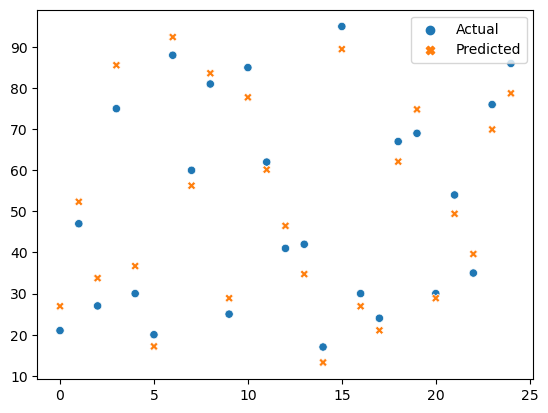

In [69]:
sns.scatterplot(data=result)

<Axes: xlabel='Hours', ylabel='Scores'>

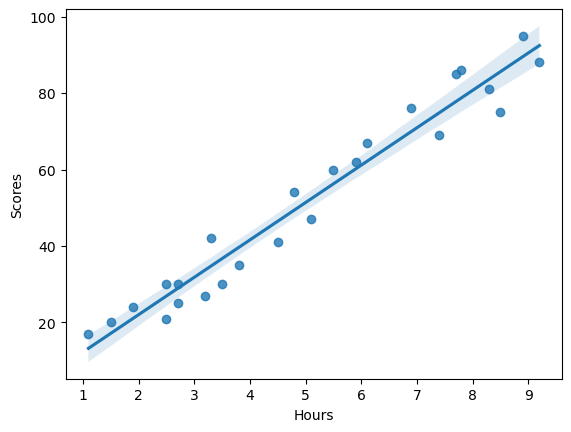

In [70]:
sns.regplot(x="Hours", y="Scores", data=df)

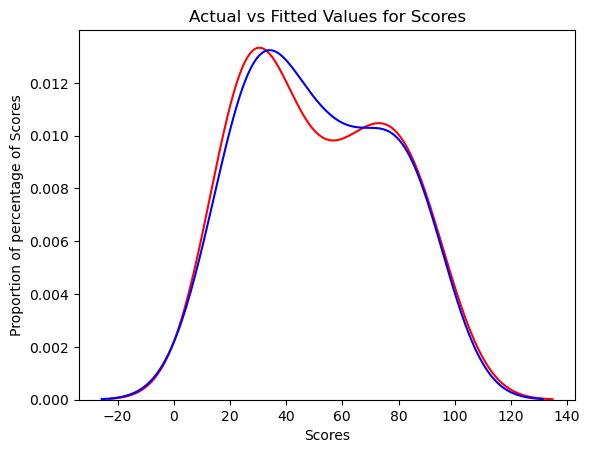

In [71]:
ax1 = sns.kdeplot(df['Scores'] , color="r", label="Actual Value")
sns.kdeplot(Y_predicted, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Scores')
plt.xlabel('Scores')
plt.ylabel('Proportion of percentage of Scores')
plt.show()
plt.close()

### Model Evaluation

In [72]:
mae = mean_absolute_error(y,Y_predicted)
mse = mean_squared_error(y,Y_predicted)
r2 = r2_score(y,Y_predicted)

print(f'Mean Absolute Error: {mae:.2f}\nMean Square Error: {mse:.2f}\nR2 Score: {r2:.2f}')

Mean Absolute Error: 4.97
Mean Square Error: 28.88
R2 Score: 0.95


In [73]:
predict_at_hrs=lm.predict([[9.25]])
print("Y_predict: ", predict_at_hrs)

Y_predict:  [92.90985477]
